In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import *
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
data= pd.read_csv("Zoo.csv")

# EDA and data visualization

In [3]:
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
data.shape

(101, 18)

In [6]:
data.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [7]:
data=data.dropna()

In [8]:
data["animal name"].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [9]:
data.sample(2)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
82,sole,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4
20,dove,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2


In [10]:
data.iloc[:,1:-1]

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


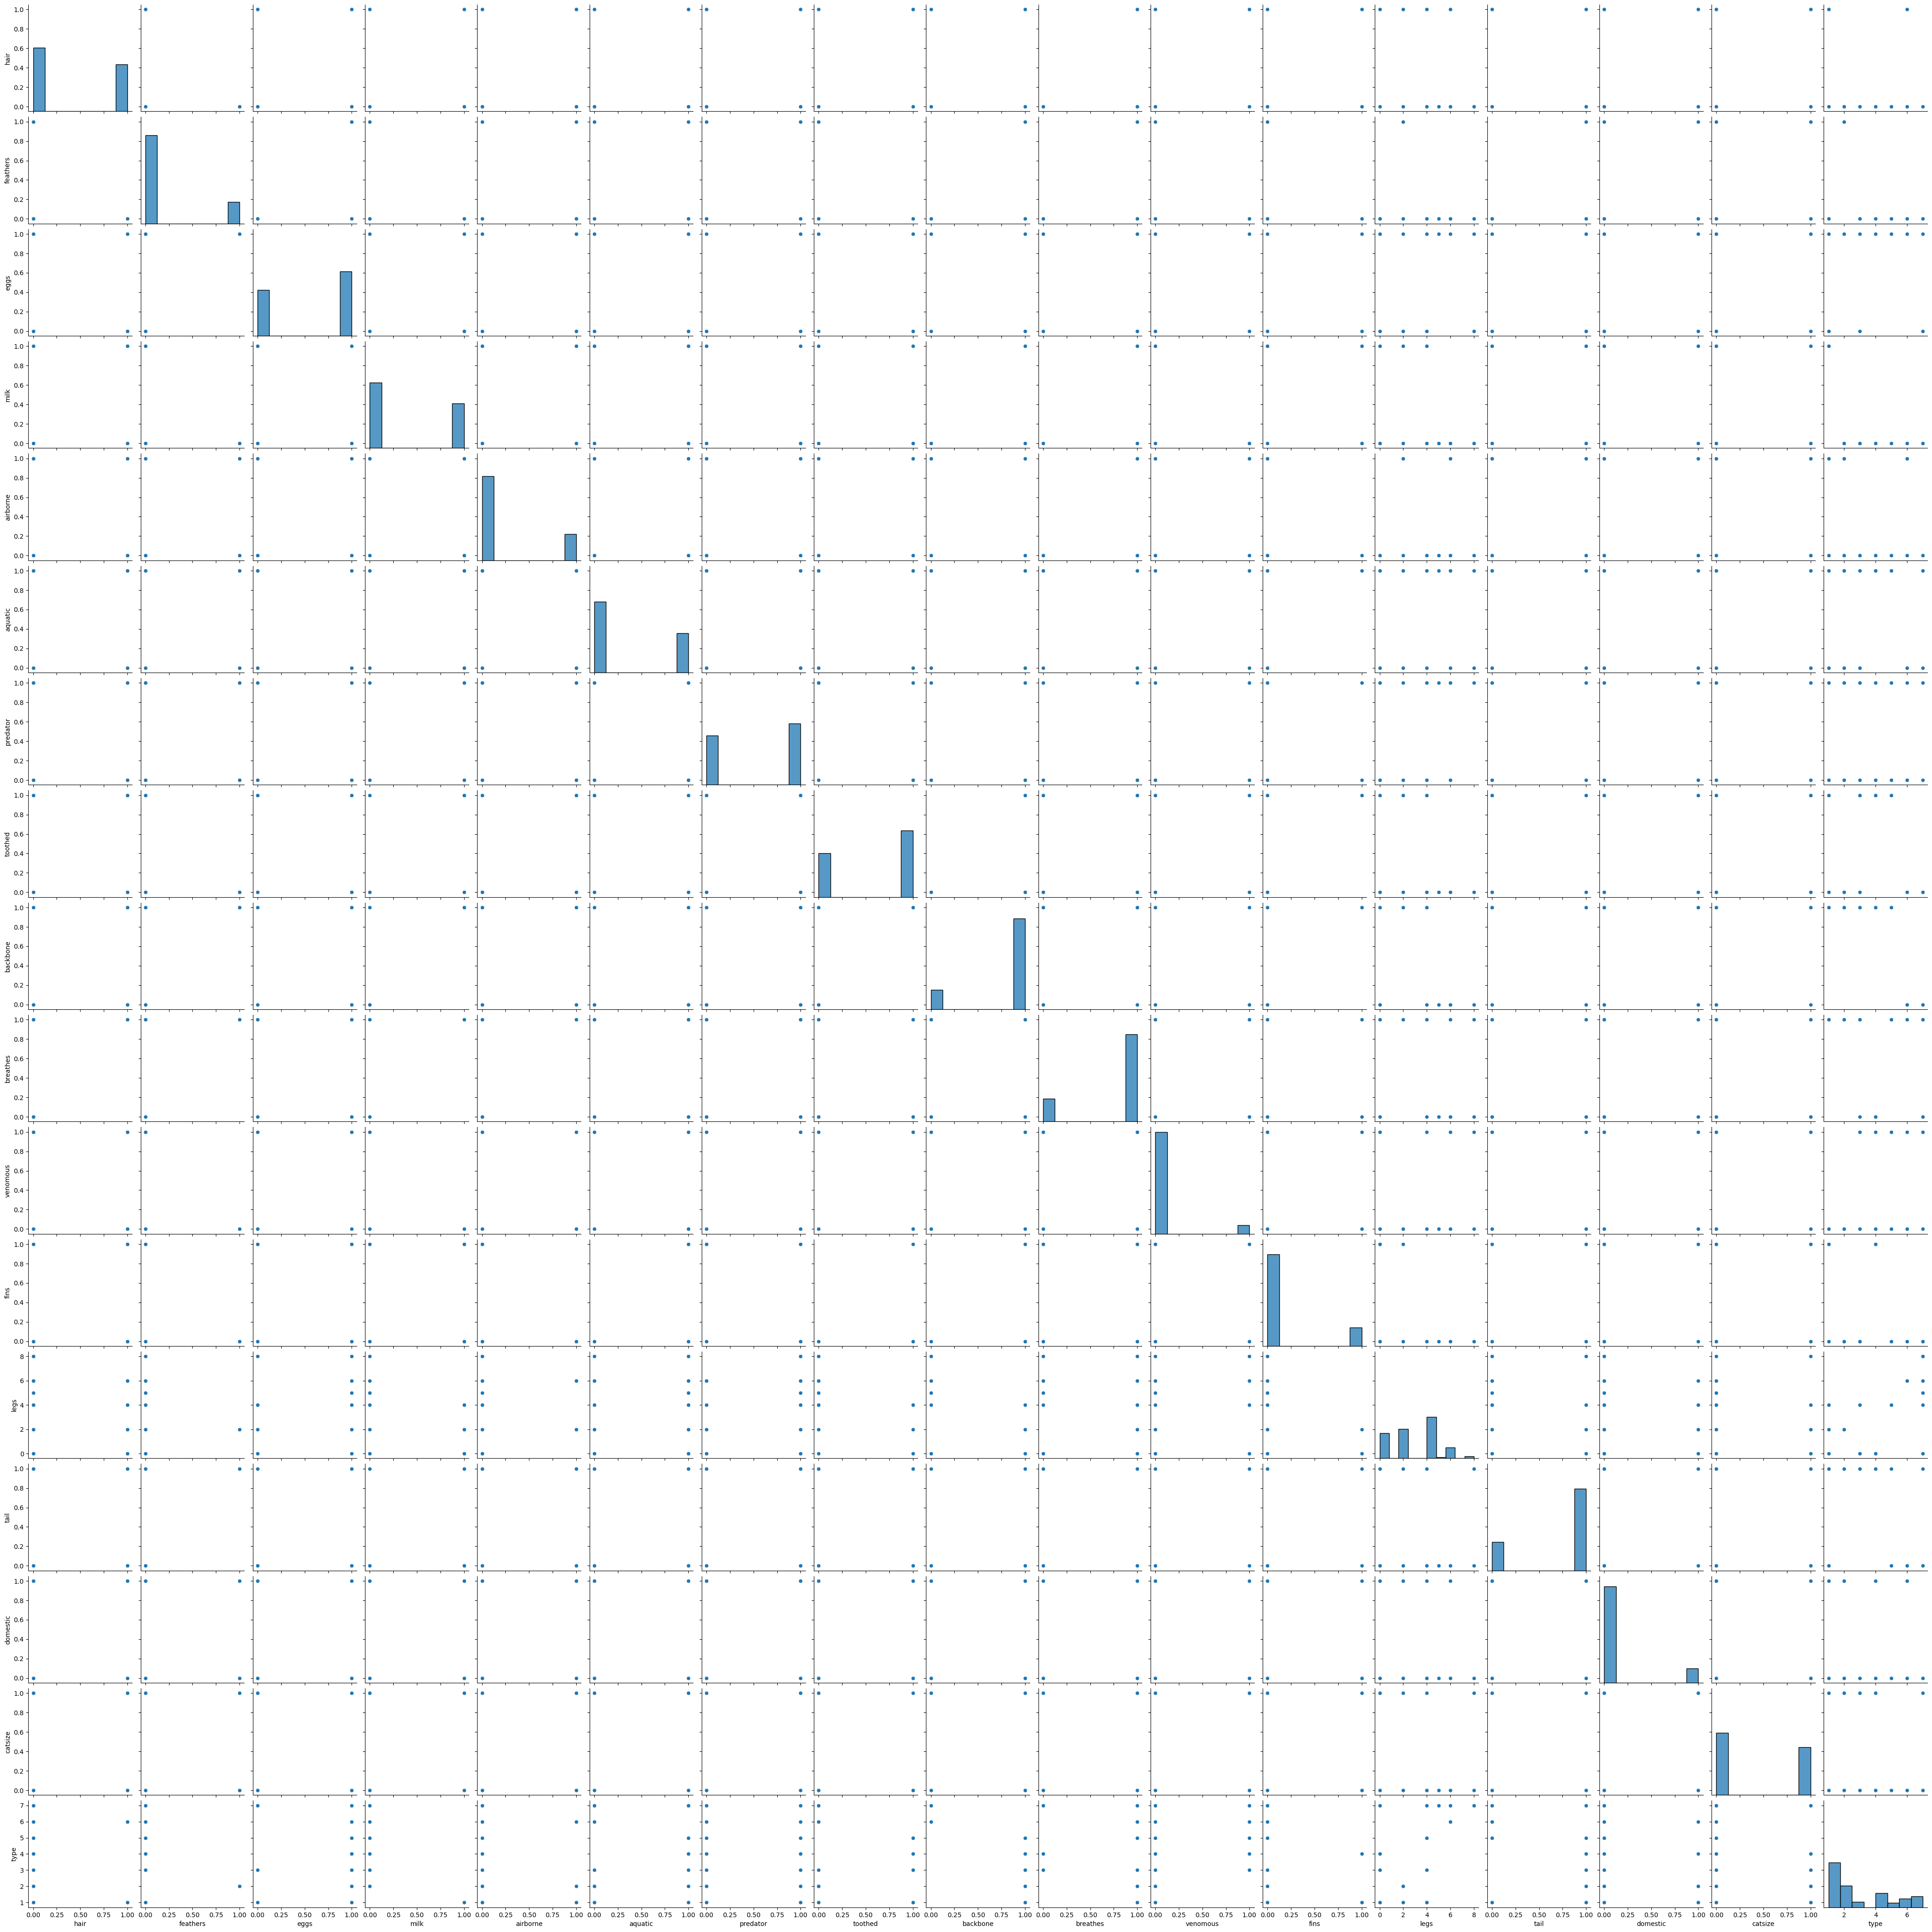

In [11]:
sns.pairplot(data)

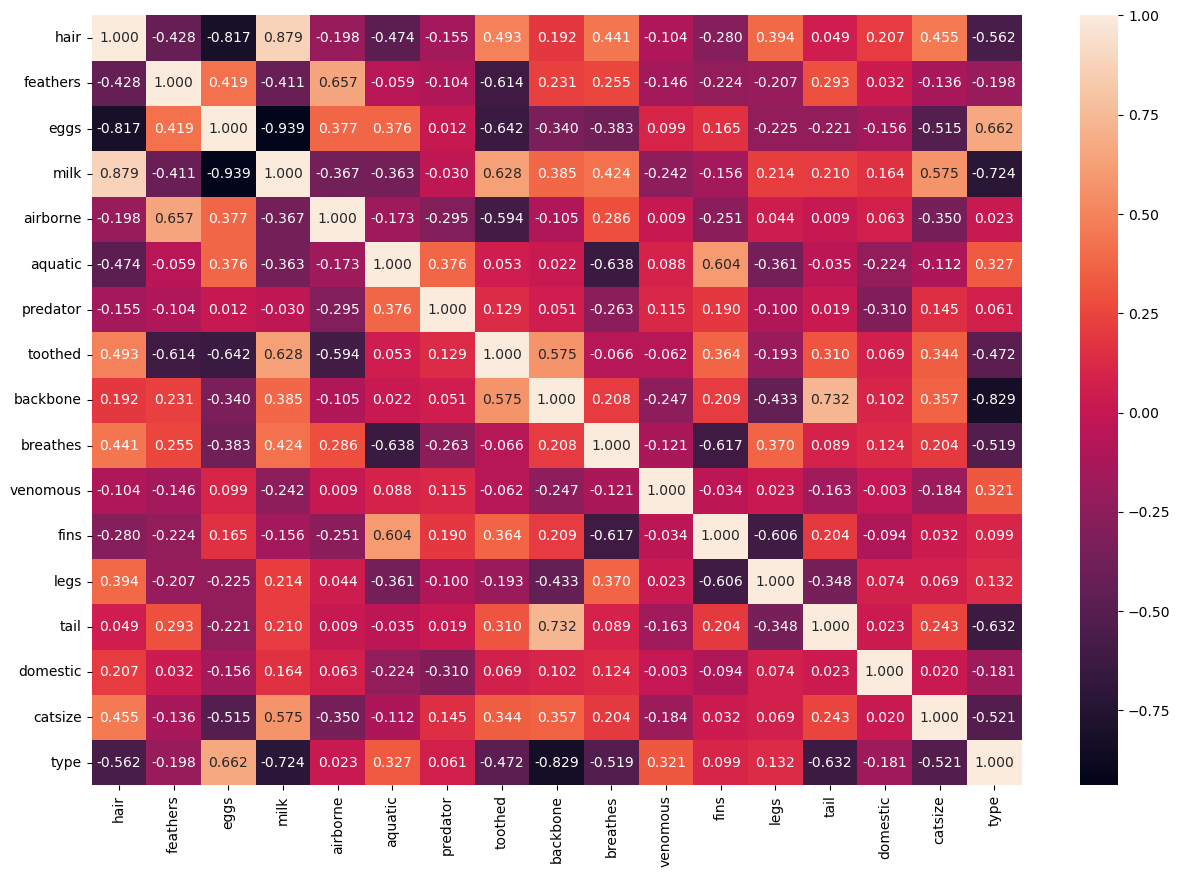

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,fmt="0.3f")
plt.show()

# model building

In [13]:
x_train,x_test,y_train,y_test=train_test_split(data.iloc[:,1:-1],data.iloc[:,-1],test_size=0.2,random_state=1)

In [14]:
scores=[]
for i in range(1,40,2):
    model=KNeighborsClassifier(i)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    scores.append(accuracy_score(y_test,pred))

In [15]:
scores

[0.9523809523809523,
 0.9523809523809523,
 0.9047619047619048,
 0.8095238095238095,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.6666666666666666]

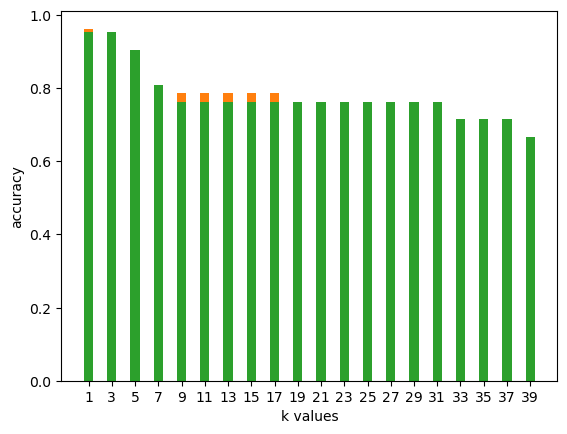

In [23]:
plt.bar(range(1,40,2),scores)
plt.xticks(range(1,40,2))
plt.xlabel("k values",size=10)
plt.ylabel("accuracy",size=10)
plt.show()

# cross validation

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
cv_scores=[]
for i in range(1,40,2):
    model=KNeighborsClassifier(i)
    score=cross_val_score(model,x_train,y_train,cv=5)
    cv_scores.append(score.mean())

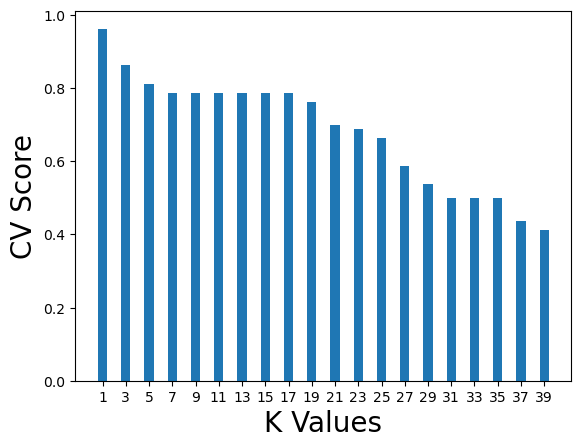

In [26]:
plt.bar(range(1,40,2),cv_scores)
plt.xticks(range(1,40,2))
plt.xlabel("K Values",size=20)
plt.ylabel("CV Score",size=20)
plt.show()

In [27]:
accuracy_sort=pd.DataFrame({"K values" : range(1,40,2),"accuracy":cv_scores})
accuracy_sort

,K values,accuracy
0,1,0.9625
1,3,0.8625
2,5,0.8125
3,7,0.7875
4,9,0.7875
5,11,0.7875
6,13,0.7875
7,15,0.7875
8,17,0.7875
9,19,0.7625


In [28]:
accuracy_sort.sort_values("accuracy",ascending=False)

,K values,accuracy
0,1,0.9625
1,3,0.8625
2,5,0.8125
3,7,0.7875
4,9,0.7875
5,11,0.7875
6,13,0.7875
7,15,0.7875
8,17,0.7875
9,19,0.7625


In [29]:
final_model=KNeighborsClassifier(1)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
accuracy_score(y_test,pred)

0.9523809523809523